In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import compress
%config InlineBackend.figure_format='retina'

In [3]:
no_markers_list = [1, 3, 5, 7, 9, 11, 13, 15]

results = []

In [4]:
results = []

for de in tqdm([1, 2,3, 5, 10, 20]):
    home = f'/home/cellatlas/tech-paper/simdata/splatter_simulations/vanilla_splatter/deprob_{de}'
    
    simulations_list = os.listdir(home)
    # Clean simulations
    simulations_list = [s for s in simulations_list if s not in ['.Rhistory', '.DS_Store', 'splatter.R', f'run_splatter_deprob_{de}.R', 'runmx.sh']]
    for simulation in simulations_list:
        sim = [int(x) for x in simulation.split('_')]


        #####
        sim.append(de)
        ######
        # Read groundtruth
        ground_truth = pd.read_csv(f'{home}/{simulation}/labels.txt', sep = '\t', header = None)
        ground_truth_values = ground_truth[0].values
        # Conver to lowercase
        ground_truth = [g.lower() for g in ground_truth_values]
        
        # Select maximum number of markers per deprob
        m = pd.read_csv(f'{home}/8000_8/15/mx/markers.txt', sep = '\t', header = None)[1]
        max_no_markers = np.max([len(ma.split(',')) for ma in m])
        for no_markers in list(compress(no_markers_list, no_markers_list <= max_no_markers)):
            sim_mk_ca = sim.copy()
            sim_mk_mx = sim.copy()

            
            sim_mk_ca.extend([no_markers])
            sim_mk_mx.extend([no_markers])

            # Read cellassign
            try:
                cellassign = pd.read_csv(f'{home}/{simulation}/{no_markers}/ca/ca_predictions.csv')
                cellassign_values = cellassign.iloc[:,1:].idxmax(axis=1)

            # Read mx
                mx_values = pd.read_csv(f'{home}/{simulation}/{no_markers}/mx/rank/assignments.txt', sep = '\t')['label'].values
                sim_mk_ca.extend(['ca', round(np.sum(cellassign_values == ground_truth) / len(cellassign_values) * 100)])
                sim_mk_mx.extend(['mx', round(np.sum(mx_values == ground_truth) / len(mx_values) * 100)])
                
                #print(simulation + "\n \t Cellassign: " + str(round(np.sum(cellassign_values == ground_truth) / len(cellassign_values) * 100)) + "%"
                     #+ "\n \t mx: " + str(round(np.sum(mx_values == ground_truth) / len(mx_values) * 100)) + "%")

                results.append(sim_mk_ca)
                results.append(sim_mk_mx)
            except:
                pass

100%|██████████| 6/6 [00:17<00:00,  2.84s/it]


In [5]:
results_df = pd.DataFrame(results)
results_df
results_df.columns = ['no_cells', 'no_celltypes', 'deprob', 'no_markers', 'assignment', 'accuracy']

# results_df.to_csv("/home/cellatlas/simdata/splatter_simulations/assignments_table.csv")

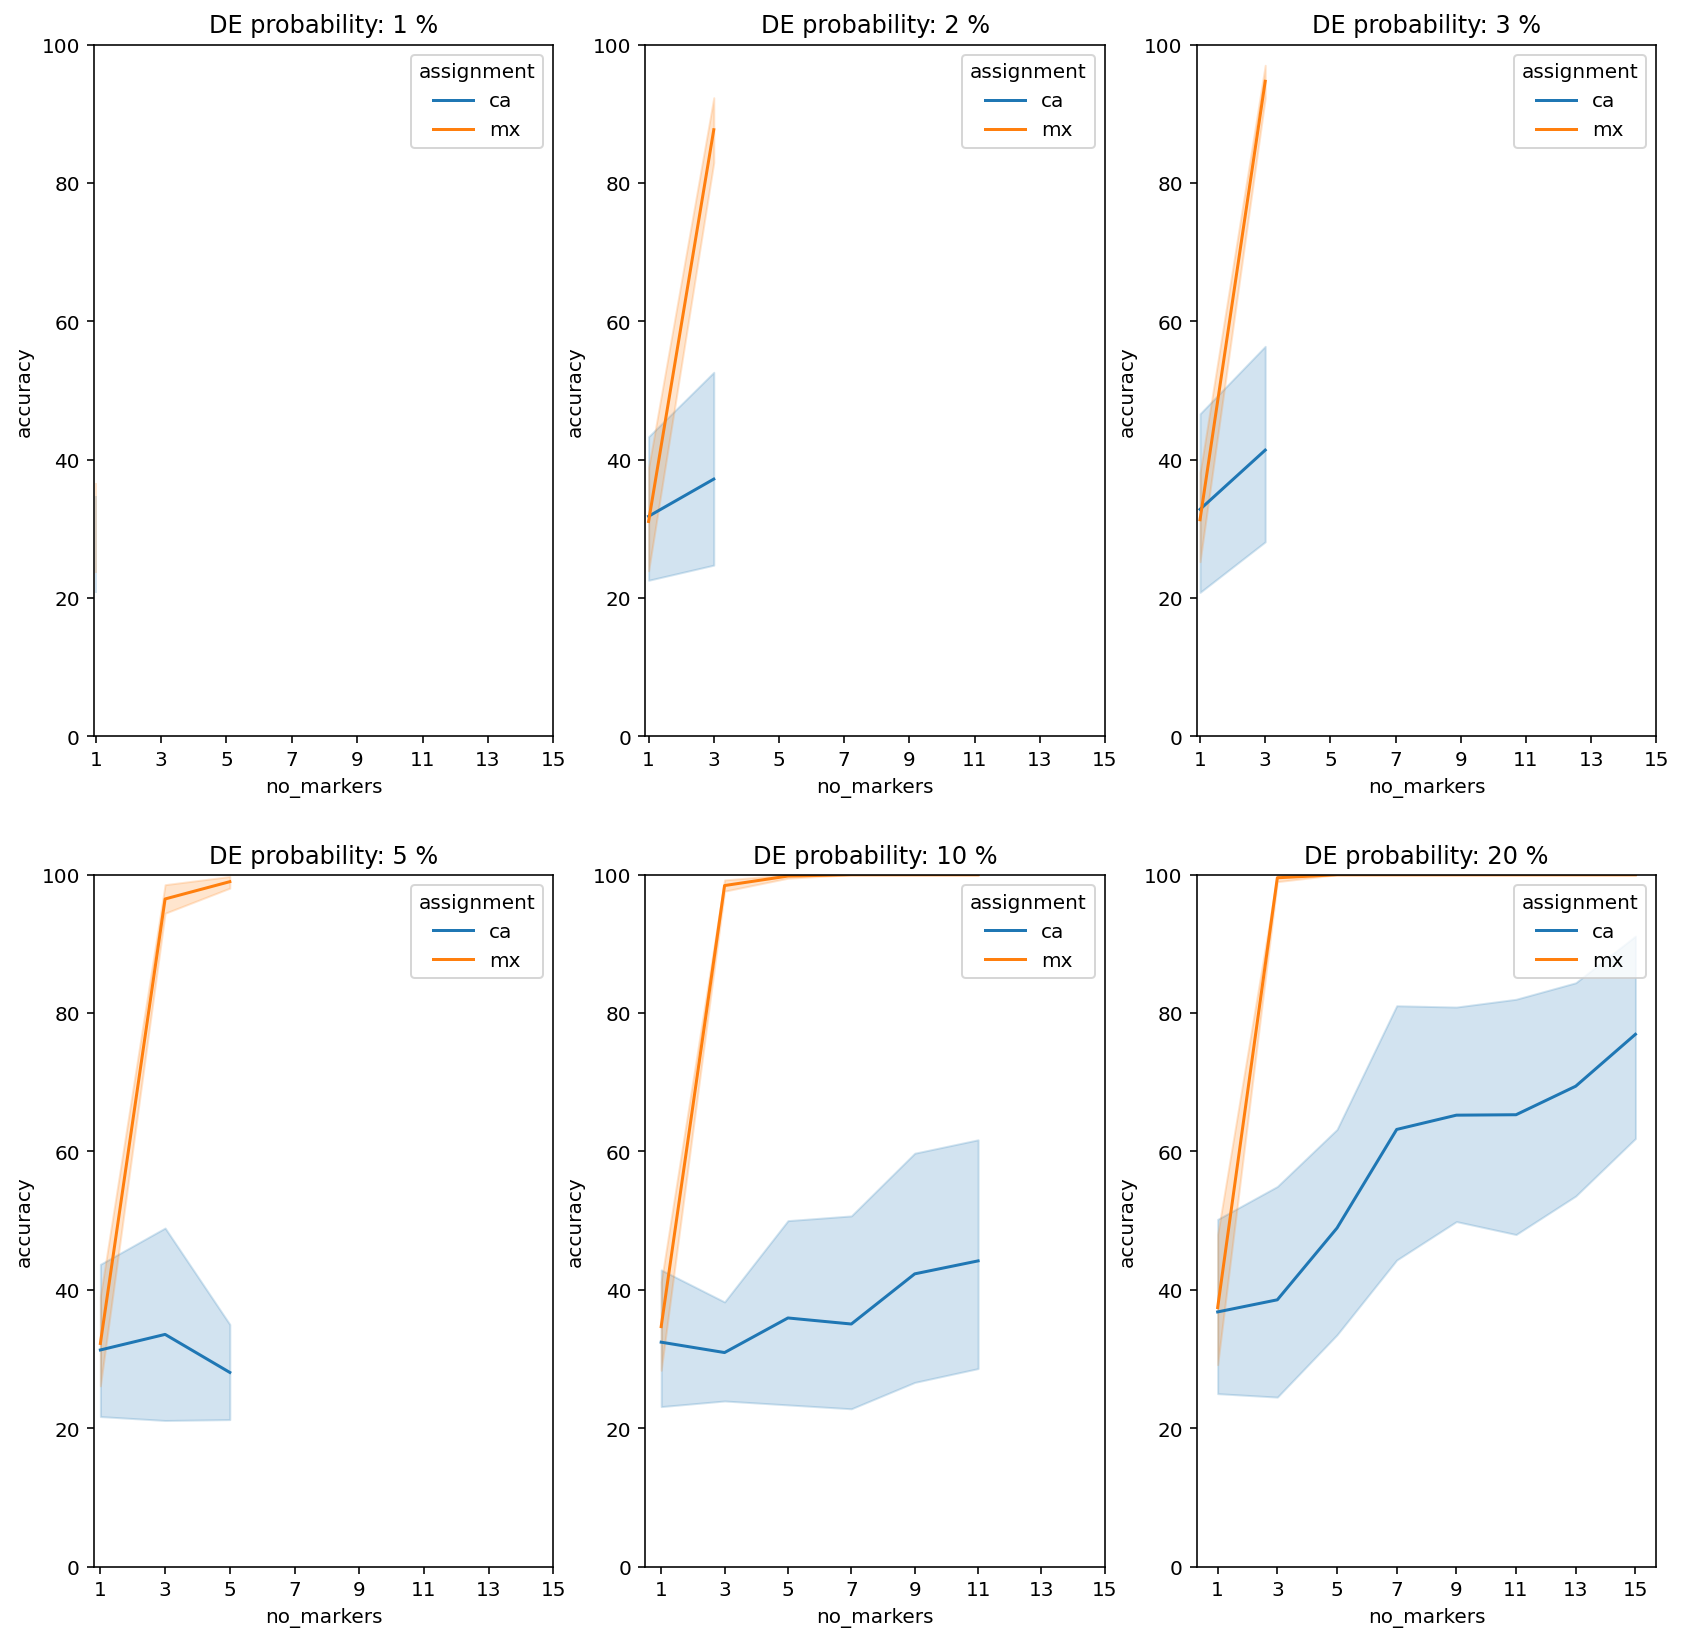

In [6]:
fig, ax = plt.subplots(2, 3, figsize = (14,14))
for de, axis in zip([1, 2, 3, 5, 10, 20], ax.flatten()):
    sns.lineplot(data = results_df.query('deprob ==@de'), x = 'no_markers', y = 'accuracy', hue = 'assignment', ax = axis)
    axis.set_title(f'DE probability: {de} %')
    axis.set_ylim(0, 100)
    axis.set_xticks(no_markers_list)

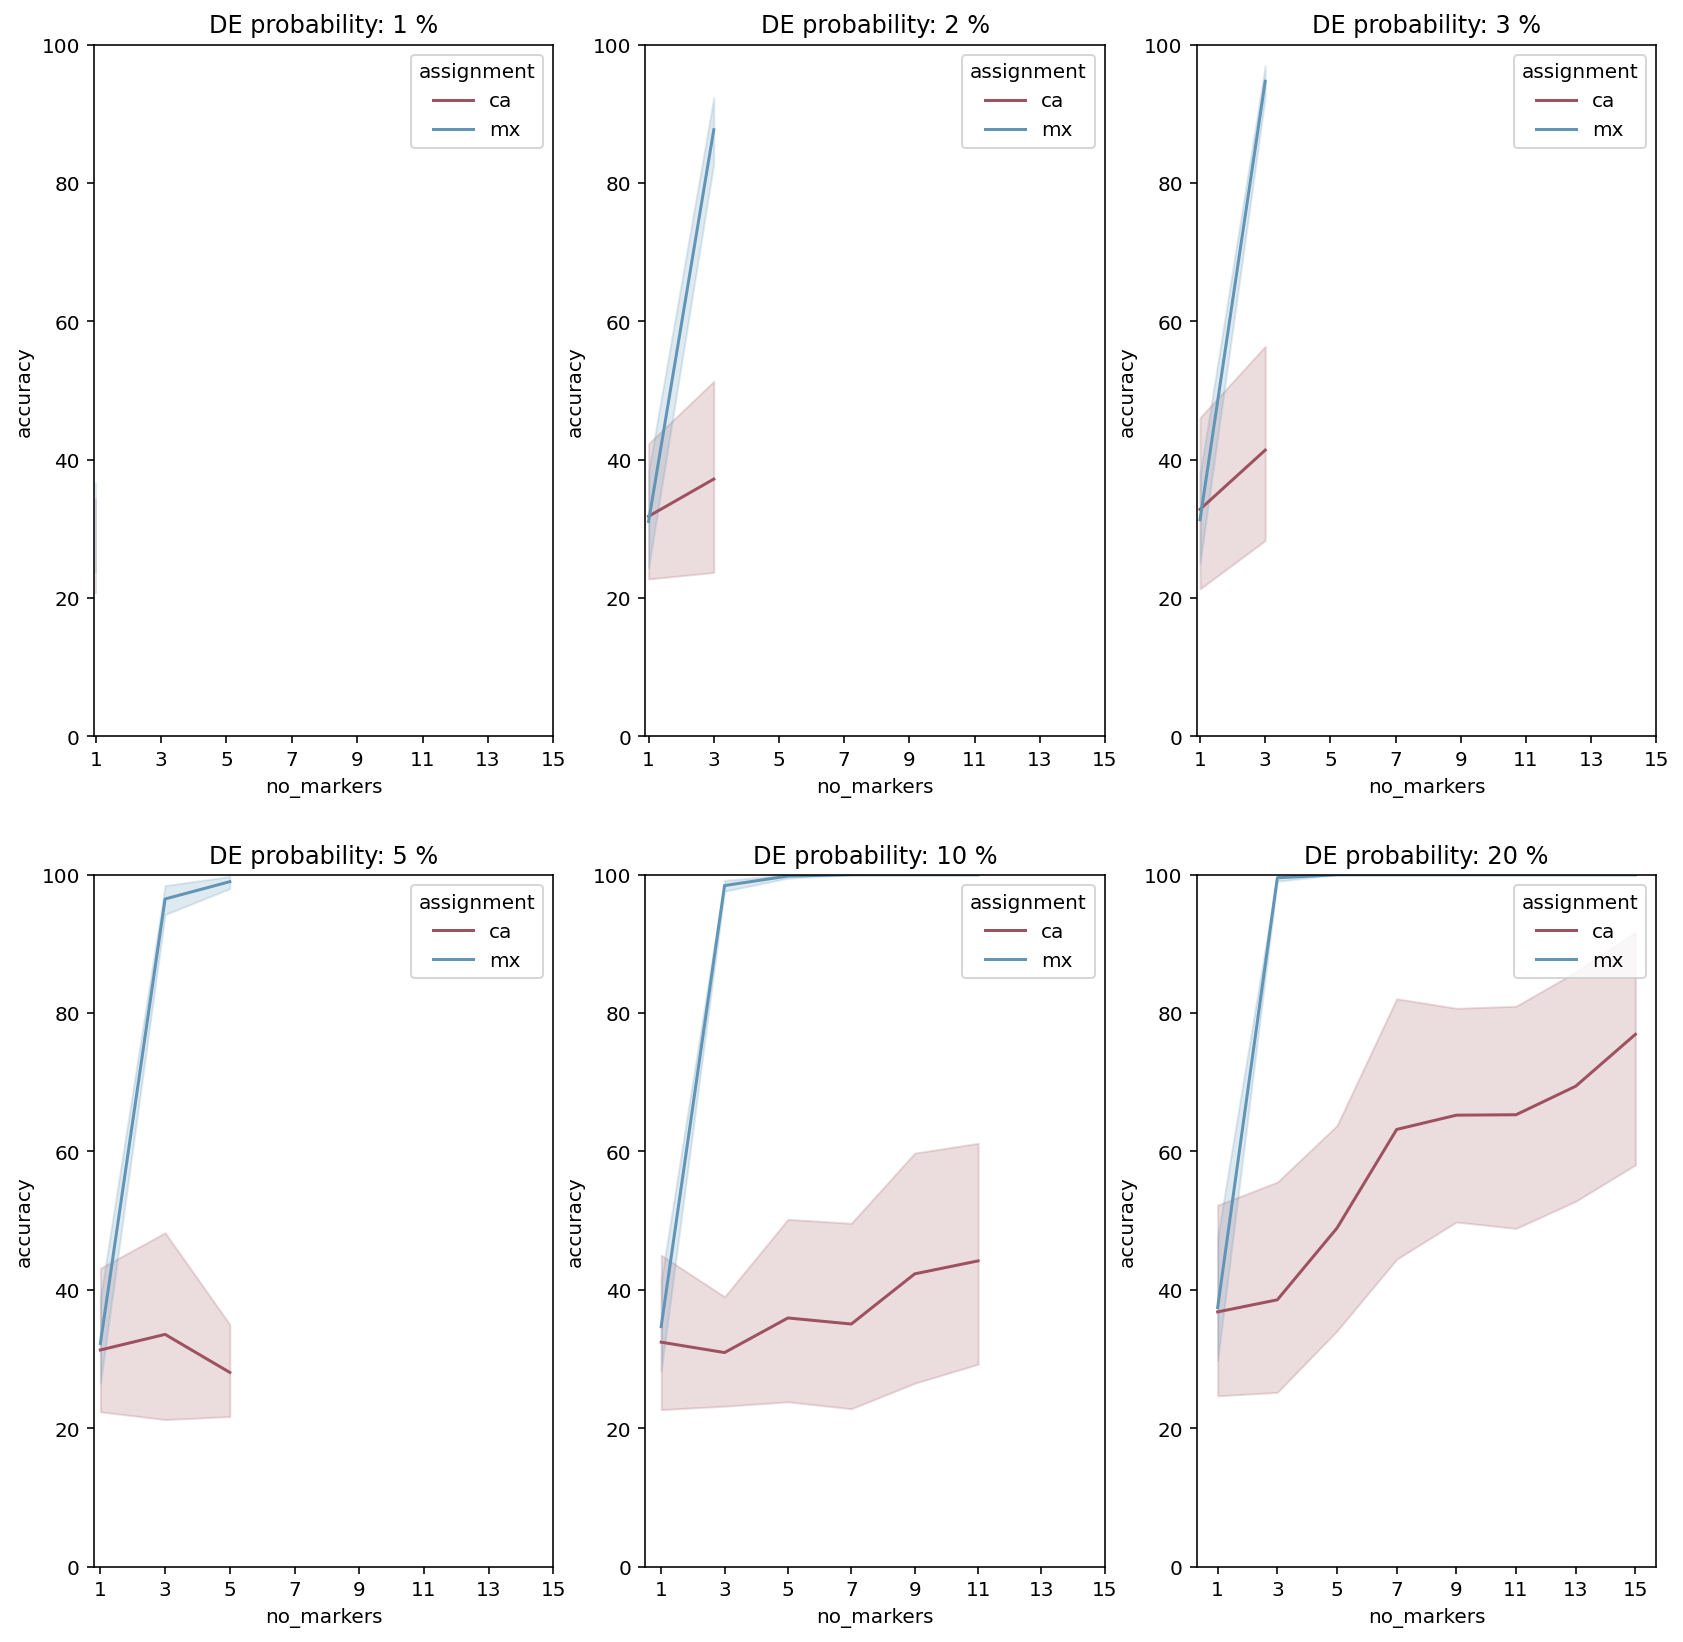

In [7]:
fig, ax = plt.subplots(2, 3, figsize = (14,14))
for de, axis in zip([1, 2, 3, 5, 10, 20], ax.flatten()):
    sns.lineplot(data = results_df.query('deprob ==@de'), x = 'no_markers', y = 'accuracy', hue = 'assignment', ax = axis, palette = ["#9E515E", '#6195B6'])
    axis.set_title(f'DE probability: {de} %')
    axis.set_ylim(0, 100)
    axis.set_xticks(no_markers_list)

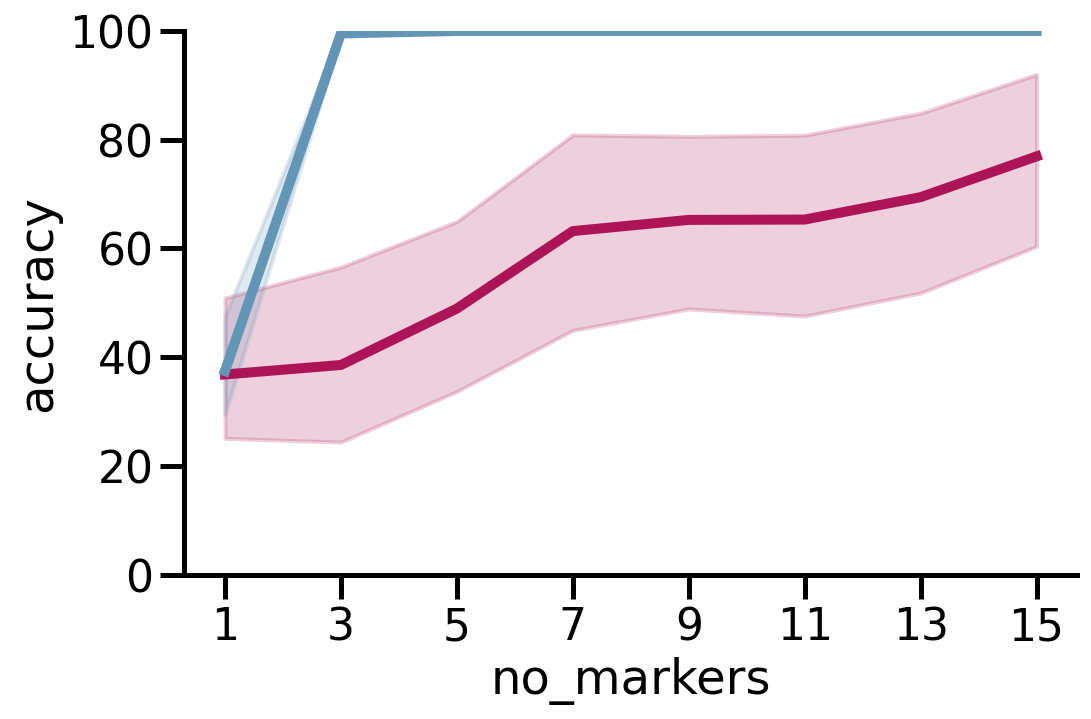

In [8]:
sns.set_context('poster')
fig, axis = plt.subplots(figsize = (8,5))
de = 20
sns.lineplot(linewidth=5, data = results_df.query('deprob ==@de'), x = 'no_markers', y = 'accuracy', hue = 'assignment', ax = axis, palette = ["#AD1457", '#6395B6'])
axis.set_ylim(0, 100)
axis.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])
axis.get_legend().remove()
sns.despine()
# plt.savefig('20de.png', transparent = True)

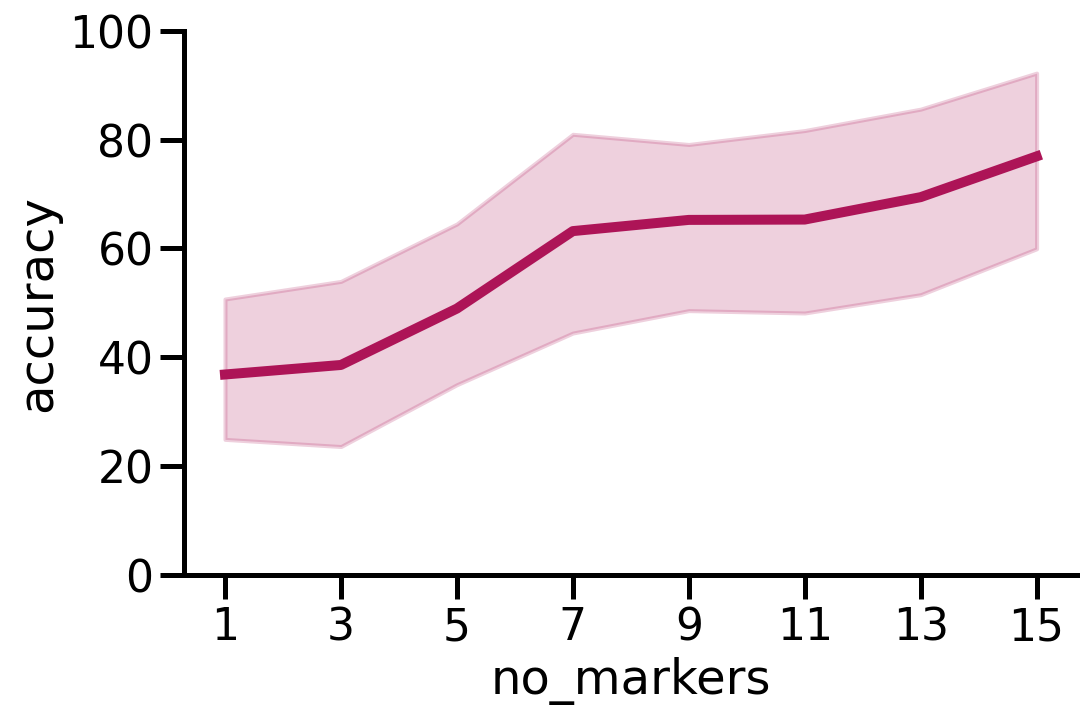

In [9]:
sns.set_context('poster')
fig, axis = plt.subplots(figsize = (8,5))
de = 20
sns.lineplot(linewidth=5, data = results_df.query('deprob ==@de').query('assignment == "ca"'), x = 'no_markers', y = 'accuracy', hue = 'assignment', ax = axis, palette = ["#AD1457"])#, '#6395B6'])
axis.set_ylim(0, 100)
axis.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])
axis.get_legend().remove()
sns.despine()
# plt.savefig('20de_caonly.png', transparent = True)

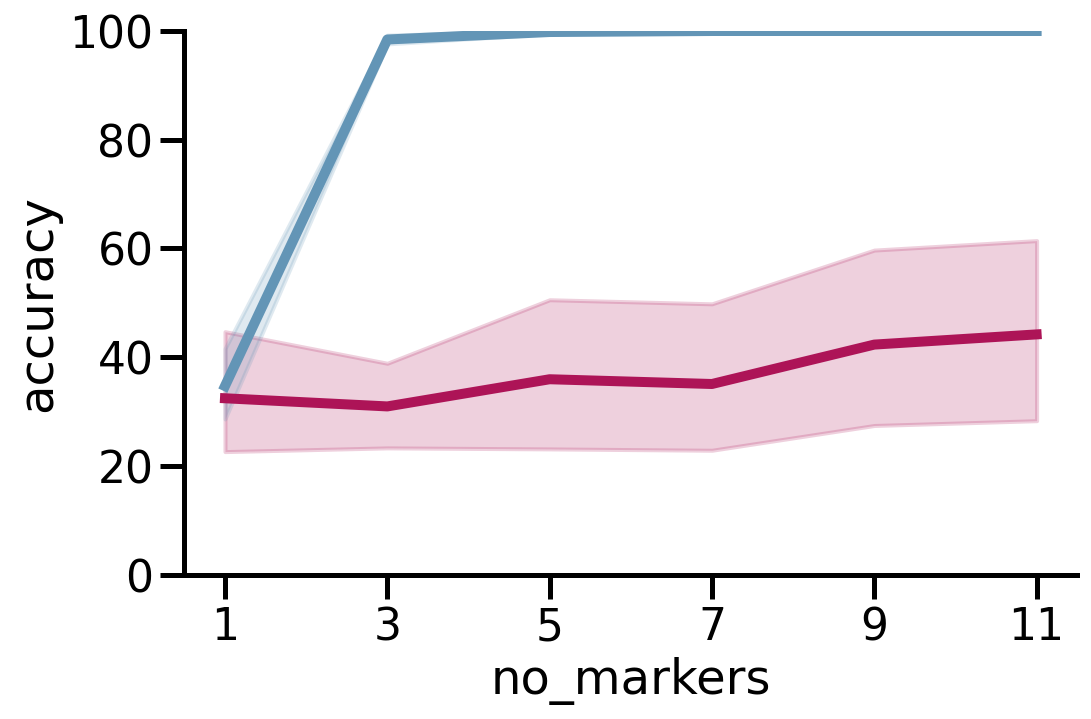

In [10]:
sns.set_context('poster')
fig, axis = plt.subplots(figsize = (8,5))
de = 10
sns.lineplot(linewidth=5, data = results_df.query('deprob ==@de'), x = 'no_markers', y = 'accuracy', hue = 'assignment', ax = axis, palette = ["#AD1457", '#6395B6'])
axis.set_ylim(0, 100)
axis.set_xticks([1, 3, 5, 7, 9, 11])
axis.get_legend().remove()
sns.despine()
# plt.savefig('10de.png', transparent = True)

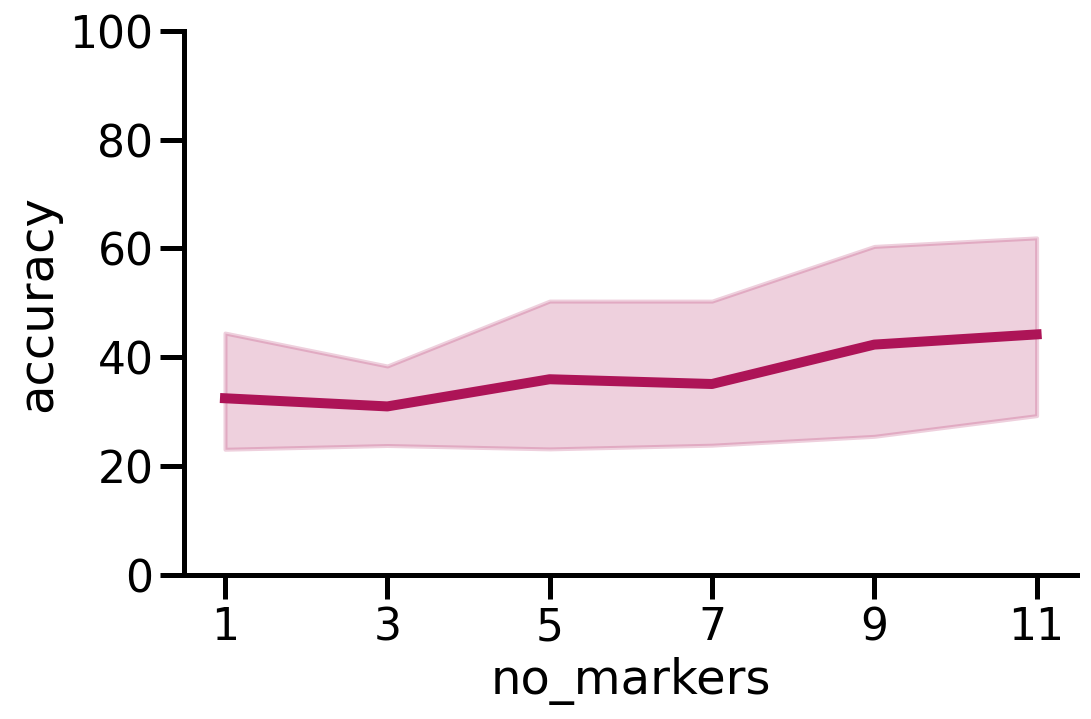

In [25]:
sns.set_context('poster')
fig, axis = plt.subplots(figsize = (8,5))
de = 10
sns.lineplot(linewidth=5, data = results_df.query('deprob ==@de').query('assignment == "ca"'), x = 'no_markers', y = 'accuracy', hue = 'assignment', ax = axis, palette = ["#AD1457"])#, '#6395B6'])
axis.set_ylim(0, 100)
axis.set_xticks([1, 3, 5, 7, 9, 11])
axis.get_legend().remove()
sns.despine()
# plt.savefig('10de_caonly.png', transparent = True)